## **23-2 DSL 기초과제 2**
기수 : <br> 10기
이름 : 이준린

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **1. 2016 presidential election in US**

https://elections.huffingtonpost.com/2016/forecast/president

#### **1-1.** 자료 A와 자료 B를 각각 ‘pres’, ‘polls’라는 이름의 개체(DataFrame)로 저장하시오.

In [3]:
pres = pd.read_csv('/content/turnout_2016.csv')
pres.head()

,county,fips,cand,st,pct_report,votes,total_votes,lead,pct,state.name
0,NaN,US,Donald Trump,US,0.9968,61195258,130180957,Donald Trump,0.470078,NaN
1,NaN,US,Hillary Clinton,US,0.9968,62521739,130180957,Donald Trump,0.480268,NaN
2,NaN,US,Gary Johnson,US,0.9968,4274900,130180957,Donald Trump,0.032838,NaN
3,NaN,US,Jill Stein,US,0.9968,1316040,130180957,Donald Trump,0.010109,NaN
4,NaN,US,Evan McMullin,US,0.9968,469770,130180957,Donald Trump,0.003609,NaN


In [4]:
polls = pd.read_csv('/content/polls_huffington.csv')
polls.head()

,Unnamed: 0,id,state,Clinton,Trump,Undecided,days_to_election,electoral_votes,sample_size
0,1,1,alabama,0.36,0.55,0.02,4,9,1131.0
1,2,2,alabama,0.37,0.58,0.05,5,9,341.0
2,3,3,alabama,0.38,0.54,0.08,12,9,585.0
3,4,4,alabama,0.35,0.55,0.03,11,9,485.0
4,5,5,alabama,0.37,0.58,0.05,13,9,349.0


#### **1-2.** 자료 A에서 집계된 대선 후보의 이름을 확인하고, 몇 명의 후보가 집계되었는지 파악하시오.

In [16]:
cand=pres['cand'].unique()
print(cand)
f'집계된 출마 후보 수 = {len(cand)}'

['Donald Trump' 'Hillary Clinton' 'Gary Johnson' 'Jill Stein'
 'Evan McMullin' 'Darrell Castle' 'Gloria La Riva' 'Rocky De La Fuente'
 ' None of these candidates' 'Richard Duncan' 'Dan Vacek' 'Alyson Kennedy'
 'Mike Smith' 'Chris Keniston' 'Lynn Kahn' 'Jim Hedges' 'Monica Moorehead'
 'Peter Skewes' 'Emidio Soltysik' 'Scott Copeland' 'Rocky Giordani'
 'Tom Hoefling' 'Laurence Kotlikoff' 'Kyle Kopitke' 'Joseph Maldonado'
 'Michael Maturen' 'Princess Jacob' 'Ryan Scott' 'Rod Silva' 'Jerry White'
 'Bradford Lyttle' 'Frank Atwood']


'집계된 출마 후보 수 = 32'

#### **1-3.** 자료 A로 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘results’를 만드시오.
● 각 주에서의 클린턴 후보 득표율과 트럼프 후보 득표율을 저장 <br>
● 총 열 개수는 3개가 되어야 함 - 열 이름 : State, Clinton, Trump <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [17]:
# 주 이름(줄임말) 확인
np.unique(pres['st'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [21]:
# 'US' 제거하기(현 상황에서 필요하지 않음)
statelist = np.unique(pres['st'])
statelist = np.delete(statelist, -8)
statelist

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [22]:
# 비어있는 데이터프레임 만들기
columns=['State','Clinton','Trump']
results = pd.DataFrame(columns=columns)
results

,State,Clinton,Trump


In [24]:
# for문으로 행 순차적으로 채우기
# 빈칸에는 알맞은 메소드가 들어가야 합니다.
for i in statelist:
    A = pres.loc[(pres['st'] == i) & (pres['fips'] == i)] # 또는 (pres['st'] == i) & (pres['county'].isnull())
    results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)

<ipython-input-24-1d2e138ddb94>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)
<ipython-input-24-1d2e138ddb94>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)
<ipython-input-24-1d2e138ddb94>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i, A.iloc[1]['pct'], A.iloc[0]['pct']]], columns=columns), ignore_index=True)
<ipython-input-24-1d2e138ddb94>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [25]:
# 결과 확인
results

,State,Clinton,Trump
0,AK,0.377176,0.528878
1,AL,0.345538,0.628884
2,AR,0.337643,0.604363
3,AZ,0.453871,0.495031
4,CA,0.327598,0.615885
5,CO,0.443593,0.472746
6,CT,0.411610,0.544755
7,DC,0.041221,0.928466
8,DE,0.419226,0.533550
9,FL,0.477881,0.490640


#### **1-4.** 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘CL’ 및 ‘TR’을 만드시오.
● CL : 클린턴 후보의 자료, TR : 트럼프 후보의 자료 <br>
● 50개 주 각각에서 후보의 실제 득표율, 예측 득표율, 표본 수를 저장 <br>
● 예측 득표율의 경우, 선거일 기준 가장 최근의 날짜에 집계된 결과만 활용(누적된 결과이므로) <br>
● 총 열 개수는 4개가 되어야 함 - 열 이름 : State, Real, Prediction, Sample_size <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [26]:
# 빈 데이터프레임 만들기
columns2 = ['State','Real','Prediction','Sample_size']
CL = pd.DataFrame(columns=columns2)
CL

,State,Real,Prediction,Sample_size


In [28]:
# 주 이름 모음
statelist2 = np.unique(polls['state'])
len(statelist2)

51

In [30]:
# 각 주별로 선거일과 가장 가까운 날에 집계된 결과만 정리
# 빈칸에는 알맞는 메소드가 들어가야 합니다.
B = polls.loc[polls.groupby(['state'])['days_to_election'].idxmin()]
B = B.reset_index()
B.head()

,index,Unnamed: 0,id,state,Clinton,Trump,Undecided,days_to_election,electoral_votes,sample_size
0,0,1,1,alabama,0.36,0.55,0.02,4,9,1131.0
1,12,13,13,alaska,0.31,0.48,0.03,4,3,409.0
2,24,25,25,arizona,0.41,0.43,0.08,3,11,392.0
3,66,67,67,arkansas,0.32,0.56,0.02,4,6,930.0
4,79,80,80,california,0.54,0.32,0.07,3,55,401.0


In [38]:
# Cinton 후보
CL['State'] = statelist2
# CL['Real'] = 순서정리 필요
CL['Prediction'] = B['Clinton']
CL['Sample_size'] = B['sample_size']
CL.head()

,State,Real,Prediction,Sample_size
0,alabama,1,0.36,1131.0
1,alaska,1,0.31,409.0
2,arizona,1,0.41,392.0
3,arkansas,1,0.32,930.0
4,california,1,0.54,401.0


results 표와 CL, TR 표의 주 이름 순서가 달라서, CL, TR 표의 주 이름 순서에 맞도록 하여 adjusted라는 list에 저장했습니다.

In [39]:
adjusted = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [41]:
# CL['Real'] 순서정리 및 실제 득표율 모음
for i in range(51):
    S = B['state'][i]
    for j in range(51) :
        D = statelist2[j]
        if  S == D :
            CL['Real'][i] = results[results['State']==adjusted[j]]['Clinton'].values[0]

<ipython-input-41-f81c1e977373>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CL['Real'][i] = results[results['State']==adjusted[j]]['Clinton'].values[0]


In [42]:
# 결과 확인
CL.head()

,State,Real,Prediction,Sample_size
0,alabama,0.345538,0.36,1131.0
1,alaska,0.377176,0.31,409.0
2,arizona,0.453871,0.41,392.0
3,arkansas,0.337643,0.32,930.0
4,california,0.327598,0.54,401.0


In [43]:
# 빈 데이터프레임 만들기
TR = pd.DataFrame(columns=columns2)
TR

,State,Real,Prediction,Sample_size


In [45]:
# Trump 후보
TR['State'] = statelist2
# TR['Real'] = 순서정리 필요
TR['Prediction'] = B['Trump']
TR['Sample_size'] = B['sample_size']
TR.head()

,State,Real,Prediction,Sample_size
0,alabama,NaN,0.55,1131.0
1,alaska,NaN,0.48,409.0
2,arizona,NaN,0.43,392.0
3,arkansas,NaN,0.56,930.0
4,california,NaN,0.32,401.0


In [46]:
# TR['Real'] 순서정리 및 실제 득표율 모음
for i in range(51):
    S = B['state'][i]
    for j in range(51) :
        D = statelist2[j]
        if  S == D :
            TR['Real'][i] = results[results['State']==adjusted[j]]['Trump'].values[0]

<ipython-input-46-e13210ff7e69>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TR['Real'][i] = results[results['State']==adjusted[j]]['Trump'].values[0]


In [47]:
# 결과 확인
TR.head()

,State,Real,Prediction,Sample_size
0,alabama,0.628884,0.55,1131.0
1,alaska,0.528878,0.48,409.0
2,arizona,0.495031,0.43,392.0
3,arkansas,0.604363,0.56,930.0
4,california,0.615885,0.32,401.0


#### **1-5.** 후보별 득표율의 예측오차 분포를 히스토그램으로 시각화하시오.

##### 1) Clinton

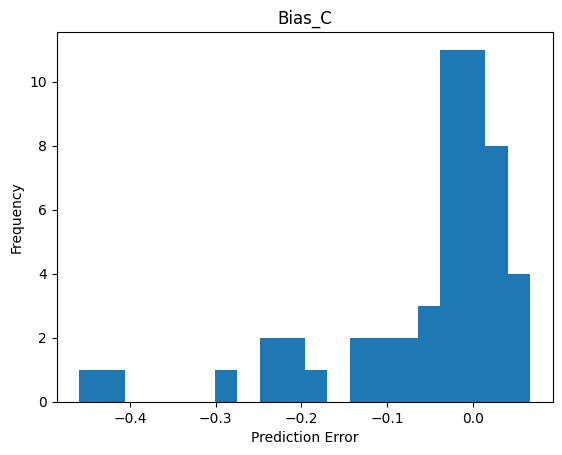

In [51]:
# Bias_C : Clinton 후보의 예측오차
CL['Bias_C'] = CL['Real'] - CL['Prediction']
plt.hist(CL['Bias_C'], bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Bias_C')
plt.show()

##### 2) Trump

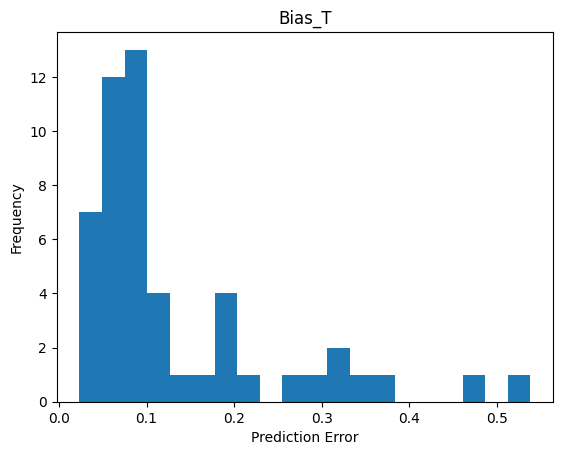

In [52]:
# Bias_T : Trump 후보의 예측오차
TR['Bias_T'] = TR['Real'] - TR['Prediction']
plt.hist(TR['Bias_T'], bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Bias_T')
plt.show()

#### **1-6.** ‘CL’과 ‘TR’에 각각 표준오차를 담은 ‘SE’라는 열(column)을 추가하시오.

In [61]:
# 'CL' 후보의 표준오차 계산
CL['SE'] = np.std(CL['Bias_C'])

# 'TR' 후보의 표준오차 계산
TR['SE'] = np.std(TR['Bias_T'])

#### **1-7.** ‘CL’과 ‘TR’에 각각 근사신뢰구간(approximate confidence interval)의 하한과 상한을 나타내는 열(column) ‘lower’과 ‘upper’를 추가하시오(유의수준 5%).

In [62]:
# 분위수값 구하는 방법
from scipy.stats import norm
Z = norm(loc = 0, scale = 1) # 표준정규분포를 따르는 확률변수 만들기
Z.ppf(0.95)

1.6448536269514722

In [63]:
z_value = norm.ppf(1 - 0.05 / 2)
CL['lower'] = CL['Prediction'] - z_value * CL['Bias_C']
CL['upper'] = CL['Prediction'] + z_value * CL['Bias_C']
TR['lower'] = TR['Prediction'] - z_value * TR['Bias_T']
TR['upper'] = TR['Prediction'] + z_value * TR['Bias_T']

#### **1-8.** 클린턴 후보와 트럼프 후보 각각의 여론조사 신뢰수준을 구하시오.

##### 1) Clinton

In [70]:
CL['confidence_interval_width'] = CL['upper'] - CL['lower']
CL['confidence_level'] = 1 - (CL['confidence_interval_width'] / 2)
print("클린턴 후보의 여론조사 신뢰수준:",CL['confidence_level'].values[0])

클린턴 후보의 여론조사 신뢰수준: 1.0283459213012178


##### 2) Trump

In [68]:
TR['confidence_interval_width'] = TR['upper'] - TR['lower']
TR['confidence_level'] = 1 - (TR['confidence_interval_width'] / 2)
print("트럼프 후보의 여론조사 신뢰수준:", TR['confidence_level'].values[0])

트럼프 후보의 여론조사 신뢰수준: 0.8453899349509855


#### **1-9.** ✎ 왜 이런 결과가 나왔다고 생각하십니까? 개인의 생각을 자유롭게 서술하시오.
참고 : https://www.vox.com/policy-and-politics/2020/11/10/21551766/election-polls-results-wrong-david-shor


*답안:*